# Ejercicio 1
Resolver con Runge-Kutta orden 4 el sistema: \begin{array}\dot x&=y-y^3 \ \dot y&=-x-y^2 \end{array}



Ejercicio 1.1

Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.

In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[2]-(x[2])^3, -x[1]-(x[2])^2]

f (generic function with 1 method)

In [3]:
using PyPlot

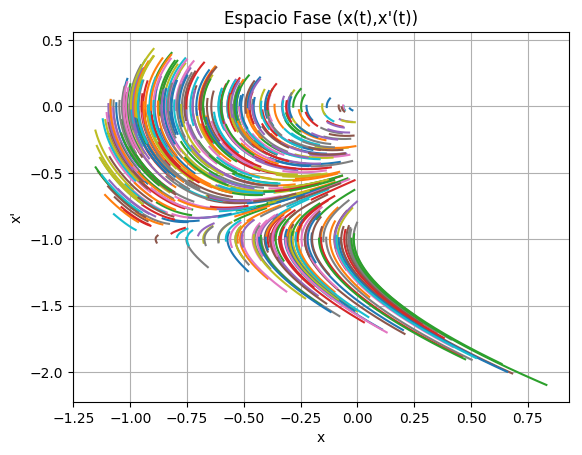

In [4]:
list=linspace(0.5,1,1000)
for i in 1:500
    ci=1*rand(2,1)-1
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
     grid("on")
    plot(map(x->x[1],y),map(x->x[2],y))
end

Ejercicio 1.2

Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

El jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ està dado como:

$$J=\left[\begin{array}{cc} 0 & 1-3y^{2} \\-1 & -2y \end{array} \right]$$

Evaluado en $\vec 0 = (0,0)$ serà:

$$J=\left[\begin{array}{cc} 0 & 1 \\-1 & 0 \end{array} \right]$$

Dado que $\tau=\text{tr} J$ es la suma de los elementos de la diagonal de la matriz J y $\Delta= \det J.$, entonces

$$\tau=0$$

$$\Delta=0-(-1)=1$$

Por lo tanto 

$$(\Delta, \tau)=(1,0)$$

es un punto central

# Ejercicio 2

Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$

Ejercicio 2.1

Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
Usen $\mu=0.5$.

In [1]:
function RK4(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t=i*h
        k1=f(x,t);
        k2=f(x+(h/2)*k1,t+(h/2));
        k3=f(x+(h/2)*k2,t+(h/2));
        k4=f(x+h*k3,t+h);
        x = x + (h/6)*(k1+2*k2+2*k3+k4);
        push!(listx,x) 
    end
     return listx
end

RK4 (generic function with 1 method)

In [2]:
f(x,t)=[x[2], 0.5*(1-(x[1])^2)*x[2]-x[1]]

f (generic function with 1 method)

In [3]:
list=0:0.01:100;
vec=RK4(f,list,[0,1]);

In [4]:
listx1=map(x->x[1],vec);
listx2=map(x->x[2],vec);

In [5]:
using PyPlot

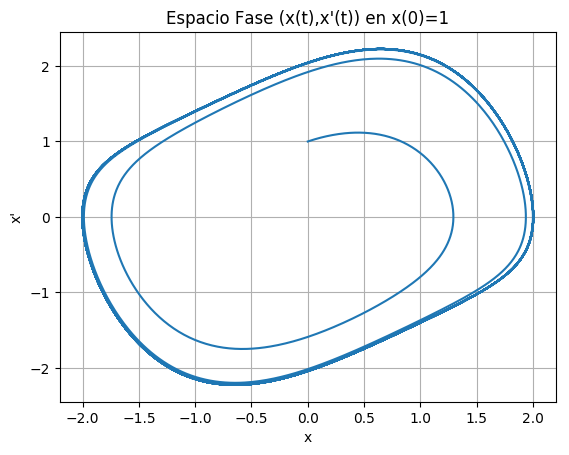

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f40771d01d0>

In [6]:
xlabel("x")
ylabel("x'")
title("Espacio Fase (x(t),x'(t)) en x(0)=1")
grid("on")
plot(listx1,listx2) #Gràfica de la soluciòn aproximada con RK4 con una condiciòn inicial x(0)=1

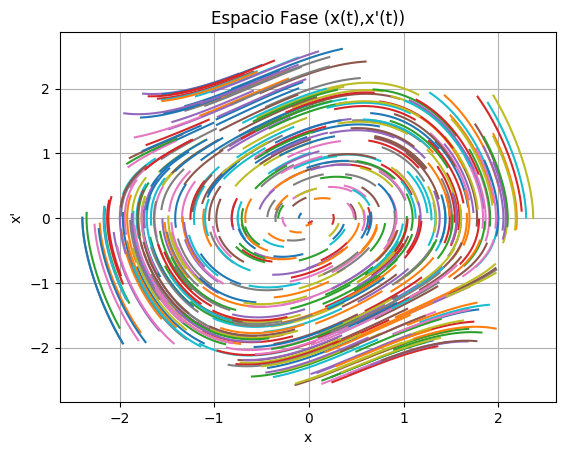

In [8]:
list=linspace(0.5,1,1000)
for i in 1:500
    ci=4*rand(2,1)-2
    y=RK4(f,list,ci)
     xlabel("x")
    ylabel("x'")
title("Espacio Fase (x(t),x'(t))")
    grid("on")
    plot(map(x->x[1],y),map(x->x[2],y)) 
end

En la gràfica anterior el espacio fase corresponde a trayectorias periòdicas aisladas llamadas ciclos lìmite, por lo que al observar el espacio fase vemos que hay un punto fijo, el cual es un punto atractor.

Ejercicio 2.2

Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

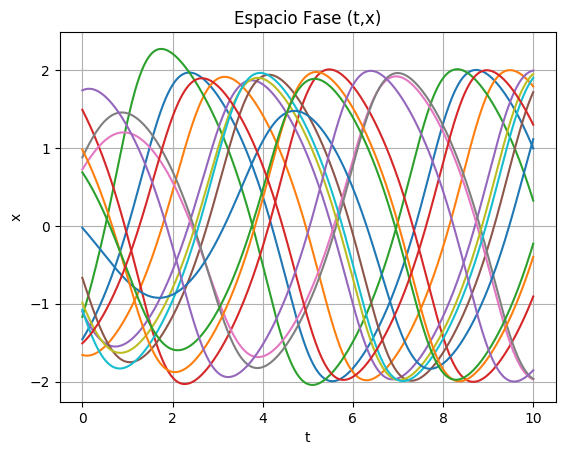

In [24]:
list=linspace(0,10,1000)
for i in 1:15
    ci=4*rand(2,1)-2
    y=RK4(f,list,ci)
     xlabel("t")
    ylabel("x")
title("Espacio Fase (t,x)")
    grid("on")
    plot(list,map(x->x[1],y))
end

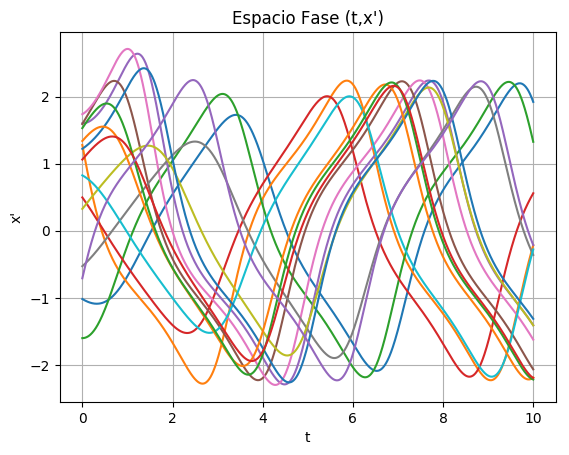

In [26]:
list=linspace(0,10,1000)
for i in 1:15
    ci=4*rand(2,1)-2
    y=RK4(f,list,ci)
     xlabel("t")
    ylabel("x'")
title("Espacio Fase (t,x')")
    grid("on")
    plot(list,map(x->x[2],y))
end